## Instalación de librerías

In [1]:
#!pip install sklearn

# Importamos librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy

# Leemos los datos

In [3]:
data = pd.read_csv('data_0p6Kcnsr.csv', header=None).to_numpy()

In [4]:
print(data)

[[-1.7535 -5.8913 -1.    ]
 [-2.6905 -3.5122 -1.    ]
 [-4.0848 -5.7715 -1.    ]
 ...
 [-5.1032  0.2884  1.    ]
 [-3.4311  1.6003  1.    ]
 [-3.6783  1.0899  1.    ]]


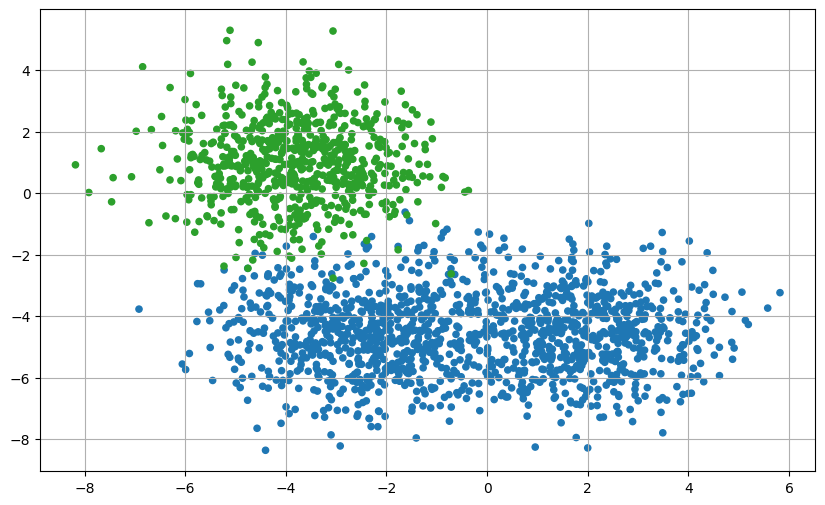

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.scatter(data[:,0], data[:,1], 20, [f'C{int(i)+1}' for i in data[:,2]])
plt.grid(True)
plt.show();

# PARTICIONAMOS LOS DATOS Y GUARDAMOS A DISCO

**CONSIGNA 1:** Escriba el código que le permita verificar si los datos están balanceados.

In [6]:
target = data[:, -1]
values, counts =  np.unique(target, return_counts=True)
print(values), print(counts)

[-1.  1.]
[1334  666]


(None, None)

**CONSIGNA 2:** Escriba el código para particionar los datos en `train`, `validation` y `test`, y guarde cada conjunto de datos con los nombres `data_trn.csv`, `data_val.csv` y `data_tst.csv` según corresponda. El código debe permitir generar archivos que contengan $65\%$ de los datos para entrenamiento, $15\%$ para validación y $10\%$ para test.

In [7]:
indices = np.arange(len(data))
np.random.shuffle(indices)
data = data[indices]

# idx
train_idx = int(len(data) * 0.75)
validate_idx = train_idx + int(len(data) * 0.15)
test_idx = validate_idx + int(len(data) * 0.10)

train_data = data[:train_idx]
validate_data = data[train_idx:validate_idx]
test_data = data[validate_idx:test_idx]

print(len(train_data)), print(len(validate_data)), print(len(test_data))

1500
300
200


(None, None, None)

In [8]:
np.savetxt('data_trn.csv', train_data, delimiter=',')
np.savetxt('data_val.csv', validate_data, delimiter=',')
np.savetxt('data_tst.csv', test_data, delimiter=',')

# LEVANTAMOS LOS DATOS DE DISCO

**NOTA**: Verifique que la carga de datos se realice correctamente de acuerdo a lo visto en la teoría.

In [9]:
filename_train = 'data_trn.csv'
filename_validation = 'data_val.csv'
filename_test = 'data_tst.csv'

### Entrenamiento

In [10]:
data = pd.read_csv(filename_train, header=None).to_numpy() # Levanta los datos en formato numpy
print(data)

[[ 2.3019 -3.2186 -1.    ]
 [-1.7698 -3.8479 -1.    ]
 [-1.0248 -3.3809 -1.    ]
 ...
 [-1.9816  1.2863  1.    ]
 [-5.4545 -6.09   -1.    ]
 [-1.9949 -3.8878 -1.    ]]


# Train

In [11]:
#------------------------------------
# INSERTAMOS COLUMNA DEL "BIAS"
#------------------------------------
bias = -np.ones((len(data), 1))
data = np.concatenate((bias, data), axis=1)  # Insertamos el "bias"

#------------------------------------
# ALEATORIZO LOS PATRONES (filas)
#------------------------------------
idxs = np.arange(len(data))  # Genero un vector de índices
np.random.shuffle(idxs)
data = data[idxs,:]

#------------------------------------
# SEPARO LOS DATOS
#------------------------------------
X_trn = data[:,:-1]
Y_trn = data[:,-1]  # La clase está en la última columna

In [12]:
print(X_trn[0]), print(Y_trn[0])

[-1.     -2.7673  0.2974]
1.0


(None, None)

### Validación

In [ ]:
data = pd.read_csv(filename_validation, header=None).to_numpy() # Levanta los datos en formato numpy
print(data)

In [14]:

#------------------------------------
# INSERTAMOS COLUMNA DEL "BIAS"
#------------------------------------
bias = -np.ones((len(data), 1))
data = np.concatenate((bias, data), axis=1)  # Insertamos el "bias" en la primera columna

#------------------------------------
# ALEATORIZO LOS PATRONES (filas)
#------------------------------------
idxs = np.arange(len(data))  # Genero un vector de índices
np.random.shuffle(idxs)
data = data[idxs,:]

#------------------------------------
# SEPARO LOS DATOS
#------------------------------------
X_val = data[:,:-1]
Y_val = data[:,-1]  # La clase está en la última columna

In [15]:
print(X_val[0]), print(Y_val[0])

[-1.     -5.0928  2.9161]
1.0


(None, None)

### Test

In [16]:
data = pd.read_csv(filename_test, header=None).to_numpy() # Levanta los datos en formato numpy


In [17]:
#------------------------------------
# INSERTAMOS COLUMNA DEL "BIAS"
#------------------------------------
bias = -np.ones((len(data), 1))
data = np.concatenate((bias, data), axis=1)  # Insertamos el "bias" en la primera columna

#------------------------------------
# ALEATORIZO LOS PATRONES (filas)
#------------------------------------
idxs = np.arange(len(data))  # Genero un vector de índices
np.random.shuffle(idxs)
data = data[idxs,:]

#------------------------------------
# SEPARO LOS DATOS
#------------------------------------
X_tst = data[:,:-1]
Y_tst = data[:,-1]  # La clase está en la última columna

In [18]:
print(X_tst[0]), print(Y_tst[0])

[-1.     -5.8869 -0.0477]
1.0


(None, None)

# FUNCIONES AUXILIARES

In [19]:
def Tanh(x):
    '''
    Función tangente hiperbólica [-1,1].
    '''
    return np.tanh(x)

#======================================================
def dTanh(x):
    '''
    Derivada de la función tangente hiperbólica.
    '''
    return 0.5 * (1 - x) * (1 + x)

**CONSIGNA 3:** Escriba el código para una función que le permita calcular, a partir de las salidas deseadas (`Yd`) y predichas (`Yp`) las siguientes medidas:
- TP (Verdaderos Positivos)
- TN (Verdaderos Negativos)
- FP (Falsos positivos)
- FN (Falsos Negativos)
- Accuracy

In [20]:
def medidas(Yd, Yp):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for yd, yp in zip(Yd, Yp):
        if yd == 1 and yp == 1:
            TP += 1
        elif yd == -1 and yp == -1:
            TN += 1
        elif yd == 1 and yp == -1:
            FN += 1
        elif yd == -1 and yp == 1:
            FP += 1

    # Check if the denominator is zero
    #if (TP + TN + FP + FN) == 0:
    #    Accuracy = None  
    #else:
    Accuracy = (TP + TN) / (TP + TN + FP + FN)

    return TP, TN, FP, FN, Accuracy

In [21]:
Yd = [1, -1, 1, 1, -1, 1, -1, 1, -1, -1]
Yp = [1, -1, 1, -1, -1, 1, 1, 1, -1, 1]

TP, TN, FP, FN, accuracy = medidas(Yd, Yp)
accuracy

0.7

# SETUP EXPERIMENTAL

In [22]:
learning_rate = 0.1
acc = 0.  # Inicializo el accuracy inicial
epoca = 0  # Inicializo contador de épocas

MIN_ACC = 1.0  # Defino mínimo accuracy deseado

MIN_ERROR = 1E6  # Inicializo la variable para
                  # registrar el mínimo error cometido.
    
MAX_EPOCAS = 500  # Defino el número máximo de épocas
                  # de entrenamiento.

MAX_COUNTER = 10  # Defino el máximo número de épocas
                  # sin mejorar el error de validación
                  # para detener el entrenamiento.


#=============================================
# ENTRENAMIENTO
#=============================================
error = []  # Inicializo estructura para almacenar
            # los errores en el tiempo
accuracy = []  # Inicializo estructura para almacenar
               # el accuracy en el tiempo

STOP = False
counter = 0

best_model_weights = None

**CONSIGNA 4:** Escriba el código para inicializar correctamente el perceptrón

In [23]:
num_features = 2
W = np.random.randn(num_features+1)
W

array([-1.00279939,  0.58111527,  0.73833788])

In [24]:
#test_num = np.tanh(W @ X_trn[0])

# ENTRENAMIENTO

In [25]:
def round_to_nearest(array):
    return np.round(array / np.abs(array))

In [26]:
def sigmoid(z): 
    """
    Sigmoid activation function
    """ 
    return 1 / (1 + np.exp(-z)) 

In [27]:
while (epoca < MAX_EPOCAS) and (acc < MIN_ACC) and (not STOP):

    epoca += 1
    
    #====================================================
    # ENTRENAMIENTO
    #======================
    for idx,(x,yd) in enumerate(zip(X_trn,Y_trn)):
        
        # Pasada hacia adelante        
        yp = np.tanh(W @ x)
        
        W = W + 0.5 * learning_rate * dTanh(yp) * (yd - yp) * x
        
    #====================================================
    
    
    #====================================================
    # VALIDACION
    #======================
    N = len(Y_val)
    Yd = np.zeros(N)
    Yp = np.zeros(N)
    e = 0
    for idx,(x,yd) in enumerate(zip(X_val,Y_val)):

        # Cálculo de la salida        
        yp = np.tanh(W @ x)
        
        # Almaceno las salidas
        Yd[idx] = yd
        Yp[idx] = yp

        e += (yp - yd)**2
    
    e /= N
    #====================================================
    
    #Yp = round_to_nearest(Yp)
    #Yp = sigmoid(Yp)
    #Yp = Tanh(Yp)
    #Yp = np.tanh(Yp)
    Yp = np.sign(Yp)
    

    #====================================================
    # CALCULO DE MEDIDAS
    # (TP, TN, FP, FN, ACCURACY)
    #=============================
    tp, tn, fp, fn, acc = medidas(Yd, Yp)
    
    #====================================================
    
    
    #----------------------
    # ALMACENO MEDIDAS
    #----------------------
    error.append(e)
    accuracy.append(acc)
    
    
    #-----------------------------------------------
    # CRITERIO DE CORTE Y ALMACENAMIENTO DEL MODELO
    #-----------------------------------------------
    if (e < MIN_ERROR):
        MIN_ERROR = e
        counter = 0
        
        #·······················
        # Almaceno el modelo
        #·······················
        best_model_weights = W.copy()
        
    else:
        counter += 1
        if counter > MAX_COUNTER:
            STOP = True
    
    #--------------------------------------------
    # MUESTRO REPORTE POR PANTALLA (POR EPOCA)
    #--------------------------------------------
    if (epoca % 10) == 0:
        print(f'Epoca: {epoca} -- Error: {e:.4} -- Tasa acierto [train]: {acc}\n')
#===============================================================

#--------------------------------------------
# MUESTRO REPORTE POR PANTALLA (FINAL)
#--------------------------------------------
print('='*83)
print(f'FINAL -- Epoca: {epoca} -- Error: {e:.4} -- Tasa acierto [train]: {acc:.4} -- Contador: {counter}')
print('='*83)

#----------------------------------------------
# GUARDAMOS LOS PESOS DEL MEJOR MODELO A DISCO
#----------------------------------------------
np.savetxt('best_model_weights.csv', best_model_weights, delimiter=',')

Epoca: 10 -- Error: 0.008531 -- Tasa acierto [train]: 0.9966666666666667

Epoca: 20 -- Error: 0.007043 -- Tasa acierto [train]: 0.9966666666666667

Epoca: 30 -- Error: 0.006191 -- Tasa acierto [train]: 0.9966666666666667

Epoca: 40 -- Error: 0.005641 -- Tasa acierto [train]: 0.9966666666666667

Epoca: 50 -- Error: 0.005273 -- Tasa acierto [train]: 0.9966666666666667

Epoca: 60 -- Error: 0.005021 -- Tasa acierto [train]: 0.9966666666666667

Epoca: 70 -- Error: 0.004848 -- Tasa acierto [train]: 0.9966666666666667

Epoca: 80 -- Error: 0.004729 -- Tasa acierto [train]: 0.9966666666666667

Epoca: 90 -- Error: 0.004646 -- Tasa acierto [train]: 0.9966666666666667

Epoca: 100 -- Error: 0.004591 -- Tasa acierto [train]: 0.9966666666666667

Epoca: 110 -- Error: 0.004554 -- Tasa acierto [train]: 0.9966666666666667

Epoca: 120 -- Error: 0.004531 -- Tasa acierto [train]: 0.9966666666666667

Epoca: 130 -- Error: 0.004519 -- Tasa acierto [train]: 0.9966666666666667

Epoca: 140 -- Error: 0.004513 -- T

### Graficación

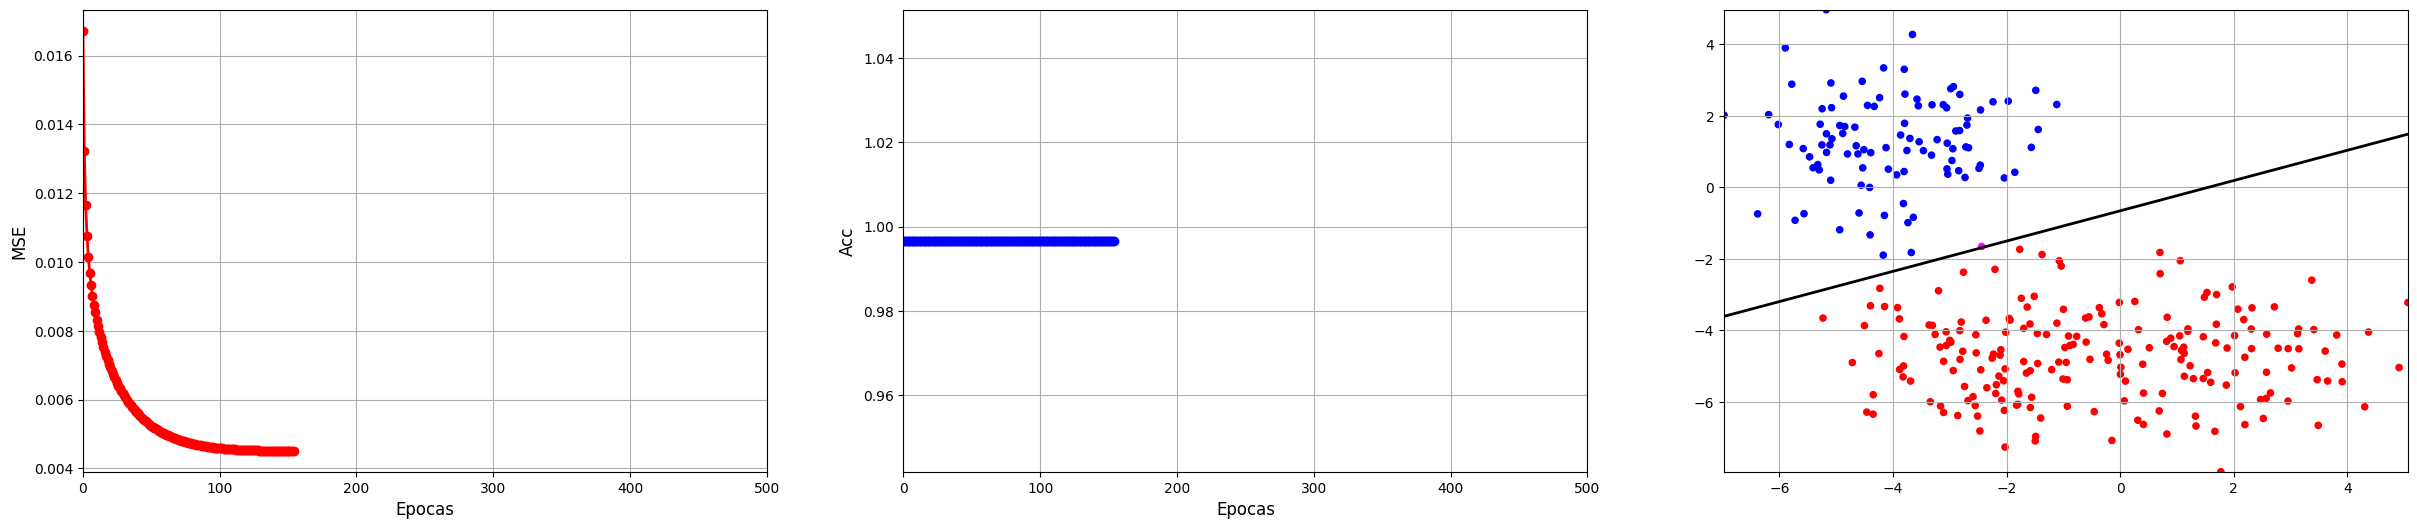

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(30,6))

epocas = np.arange(epoca)

# ERROR
ax[0].plot(epocas, error, 'o-r', lw=2)
ax[0].grid(True)
ax[0].set_xlim(0,MAX_EPOCAS)
ax[0].set_xlabel('Epocas', fontsize=12)
ax[0].set_ylabel('MSE', fontsize=12)

# ACC
ax[1].plot(epocas, accuracy, 'o-b', lw=2)
ax[1].grid(True)
ax[1].set_xlim(0,MAX_EPOCAS)
ax[1].set_xlabel('Epocas', fontsize=12)
ax[1].set_ylabel('Acc', fontsize=12)

# CLASIFICACION

C = []
for i in range(len(Yd)):
    if (np.sign(Yd[i]) == np.sign(Yp[i])) and (Yd[i] == 1):
        C.append('blue')
    if (np.sign(Yd[i]) == np.sign(Yp[i])) and (Yd[i] == -1):
        C.append('red')
    if (np.sign(Yd[i]) != np.sign(Yp[i])) and (Yd[i] == 1):
        C.append('cyan')
    if (np.sign(Yd[i]) != np.sign(Yp[i])) and (Yd[i] == -1):
        C.append('magenta')
        
ax[2].scatter(X_val[:,1], X_val[:,2], 20, C)

#-----------------------------------------------
# CONSTRUCCION DE LA FRONTERA DE DECISION
x = np.array([X_val[:,1].min(), X_val[:,1].max()])
b = W[0]/W[2]
m = W[1]/W[2]

ax[2].plot(x, b - m * x, '-k', lw=2)
ax[2].set_xlim(X_val[:,1].min(), X_val[:,1].max())
ax[2].set_ylim(X_val[:,2].min(), X_val[:,2].max())
ax[2].grid(True)

# TEST

In [30]:
#=====================================
# LEVANTAMOS DE DISCO EL MEJOR MODELO
#=====================================
w = np.loadtxt('best_model_weights.csv', delimiter=',')


#====================================================
# TESTEO
#======================
N = len(Y_tst)
Yd = np.zeros(N)
Yp = np.zeros(N)

for idx,(x,yd) in enumerate(zip(X_tst,Y_tst)):

    # Cálculo de la salida
    yp = np.tanh(w @ x)

    # Cálculo de las métricas
    Yd[idx] = yd
    Yp[idx] = yp

Yp = np.sign(Yp)

#====================================================
# CALCULO DE MEDIDAS
# (TP, TN, FP, FN, ACCURACY)
#=============================
tp, tn, fp, fn, acc = medidas(Yd, Yp)


print('\nTasa acierto [test]: {}\n'.format(acc))

print('Pesos [W]: {}\n\n'.format(W))


Tasa acierto [test]: 0.995

Pesos [W]: [-2.06149106 -1.32978691  3.14478182]




### Graficación

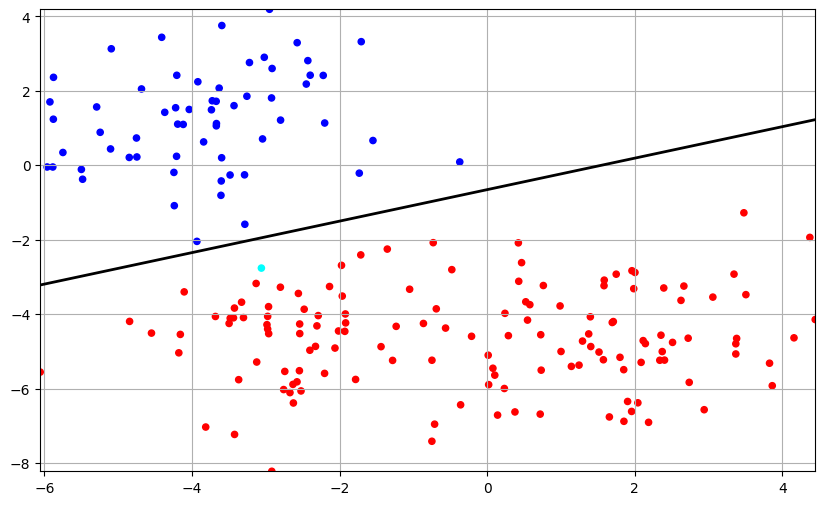

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

C = []
for i in range(len(Yd)):
    if (np.sign(Yd[i]) == np.sign(Yp[i])) and (Yd[i] == 1):
        C.append('blue')
    if (np.sign(Yd[i]) == np.sign(Yp[i])) and (Yd[i] == -1):
        C.append('red')
    if (np.sign(Yd[i]) != np.sign(Yp[i])) and (Yd[i] == 1):
        C.append('cyan')
    if (np.sign(Yd[i]) != np.sign(Yp[i])) and (Yd[i] == -1):
        C.append('magenta')
        
ax.scatter(X_tst[:,1], X_tst[:,2], 20, C)

#-----------------------------------------------
# CONSTRUCCION DE LA FRONTERA DE DECISION
x = np.array([X_tst[:,1].min(), X_tst[:,1].max()])
b = W[0]/W[2]
m = W[1]/W[2]

ax.plot(x, b - m * x, '-k', lw=2)
ax.set_xlim(X_tst[:,1].min(), X_tst[:,1].max())
ax.set_ylim(X_tst[:,2].min(), X_tst[:,2].max())
ax.grid(True)